# 556. Next Greater Element III

### Difficulty: <font color = orange> Medium </font>

---

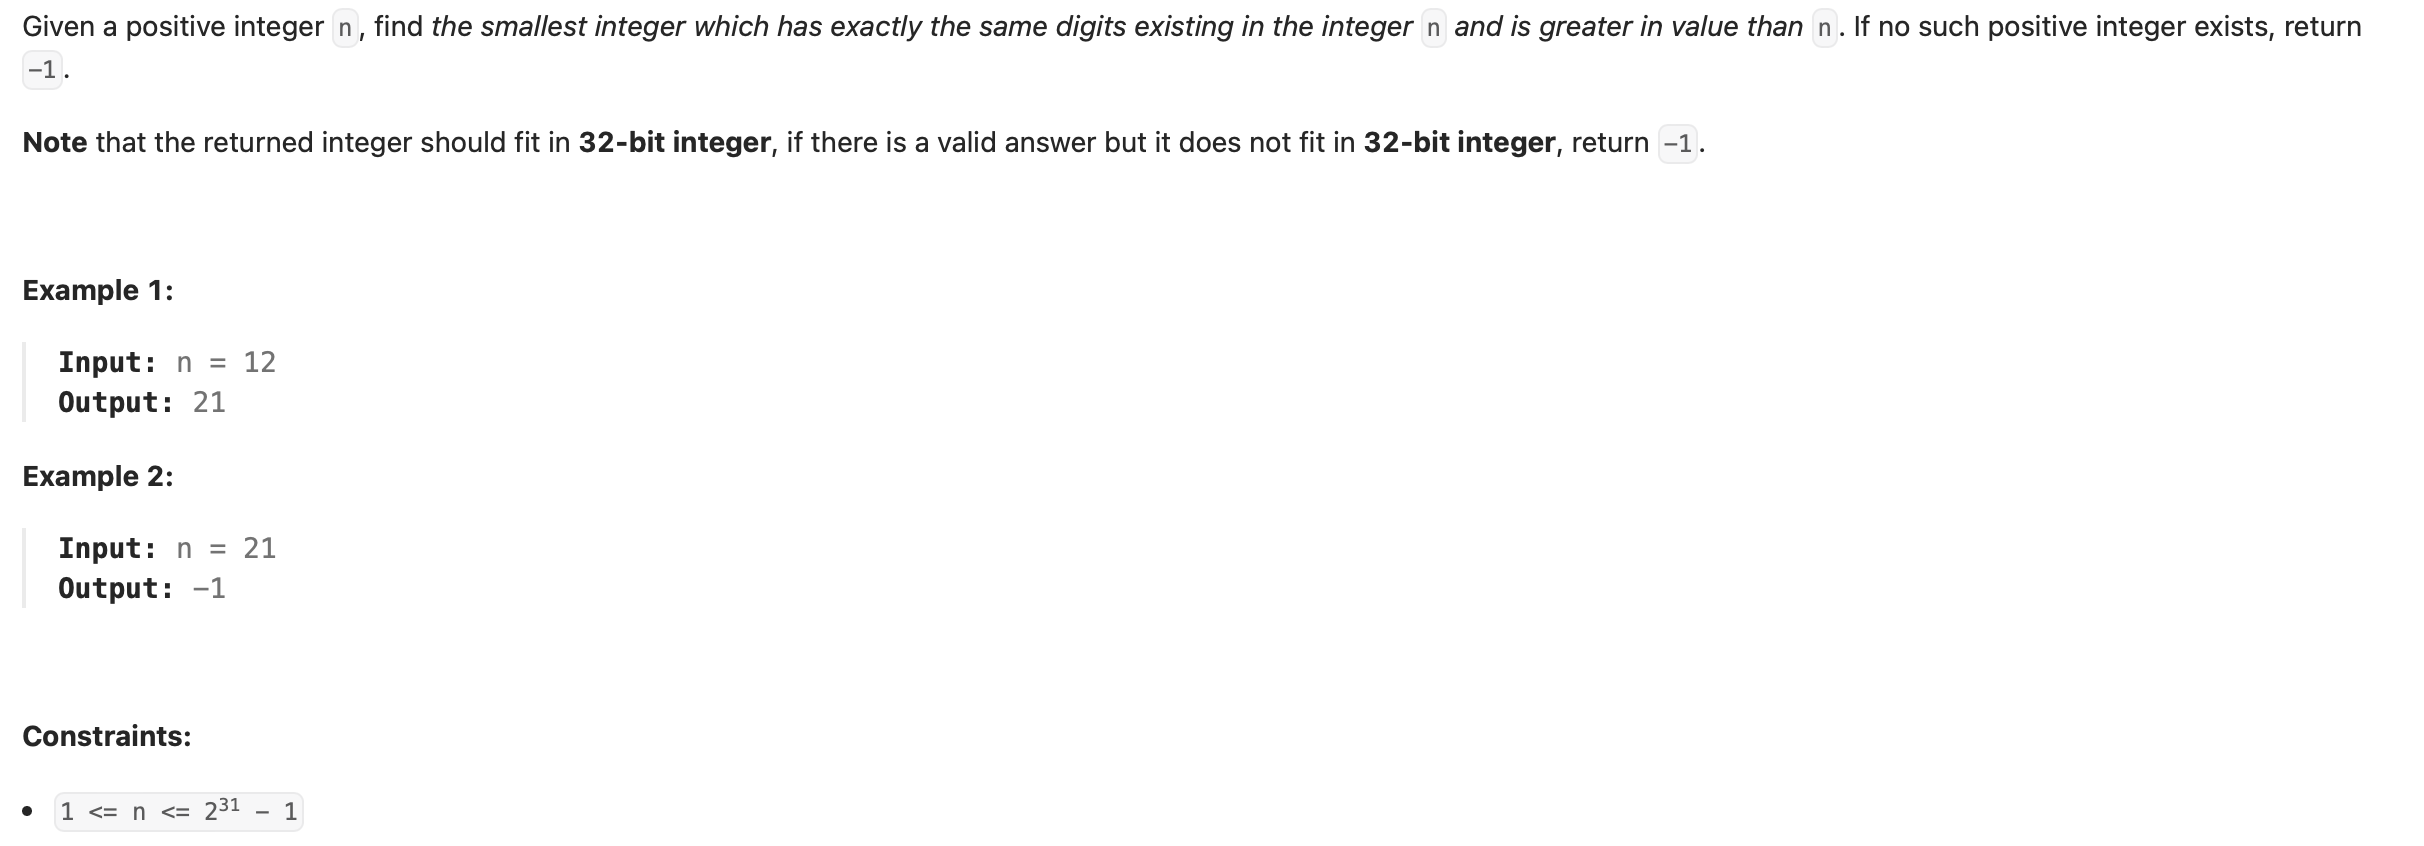

## Approach Overview:

Iterate through the digits of `n` starting from the end until we find the first **non-increasing** / **decreasing** digit. 

We then AGAIN iterate through the digits of `n` starting from the end until we find a digit bigger than the **non-increasing** / **decreasing digit**, once we do, we then swap their positions and reverse all the digits located on the right of the original **non-increasing digit's** position.


## Detailed Explanation:

This solution is rooted in the Next Permuatation theory (which is the mathematical procedure for finding the **next** greater permutation of an input set of numbers.

**Procedure for next greater permutation:**

1. Firtly, we loop through all the digits of `n` starting from the last one until we find the first non-increasing / decreasing digit. 


We can call it the pivot point.


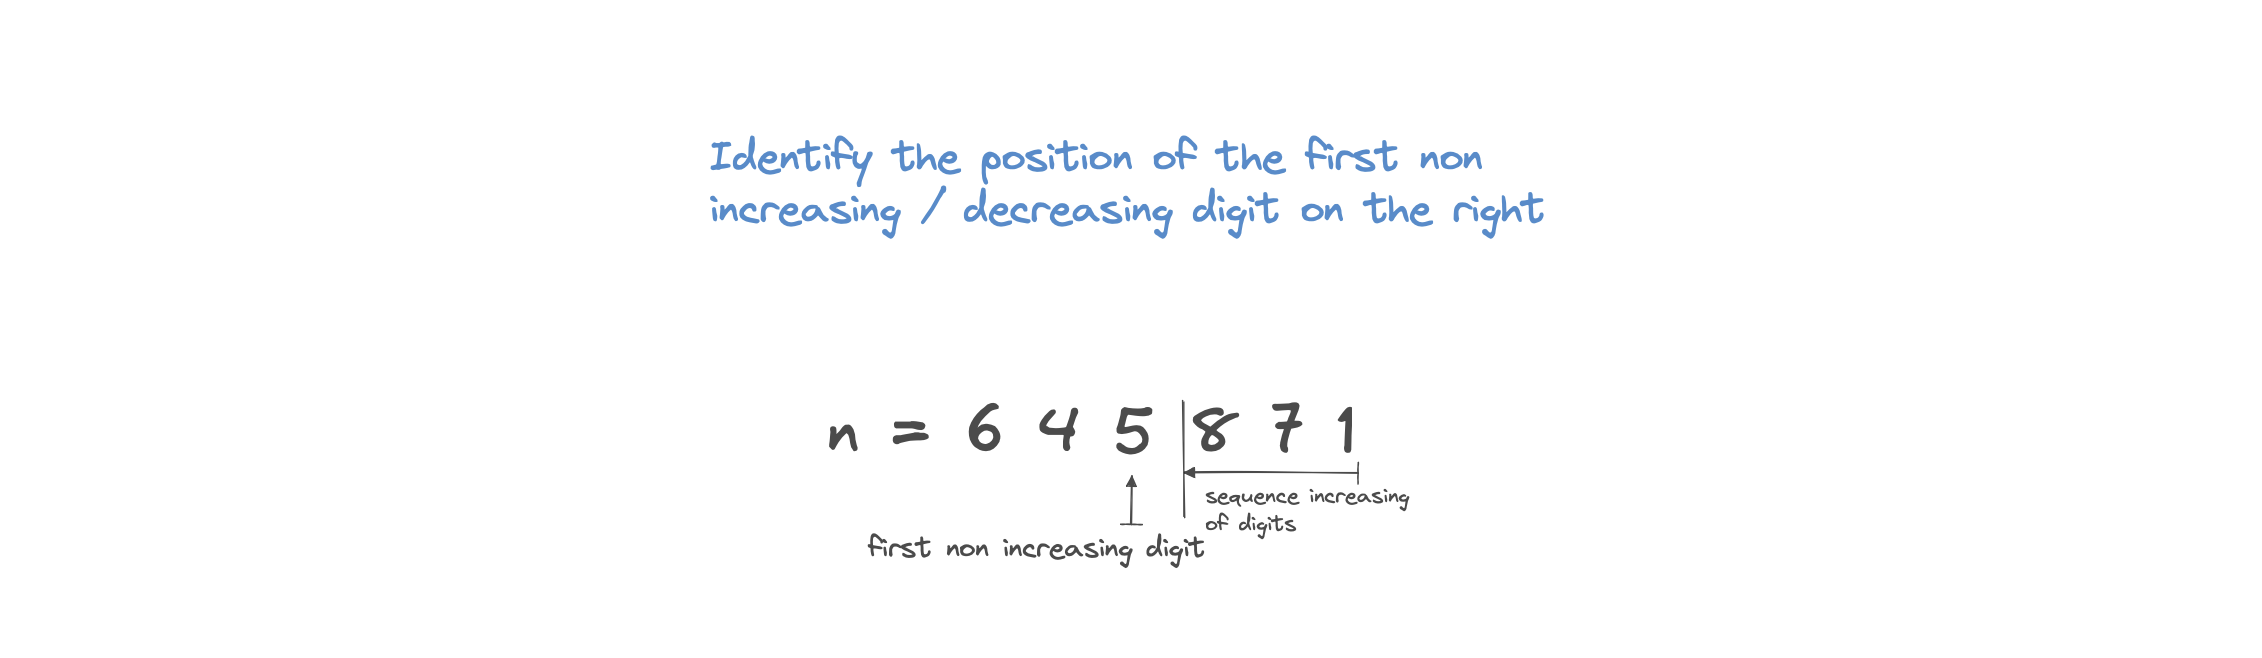


2. Secondly, we find the number of the right of that's **just bigger** than it (it = the non increasing digit / the pivot digit)

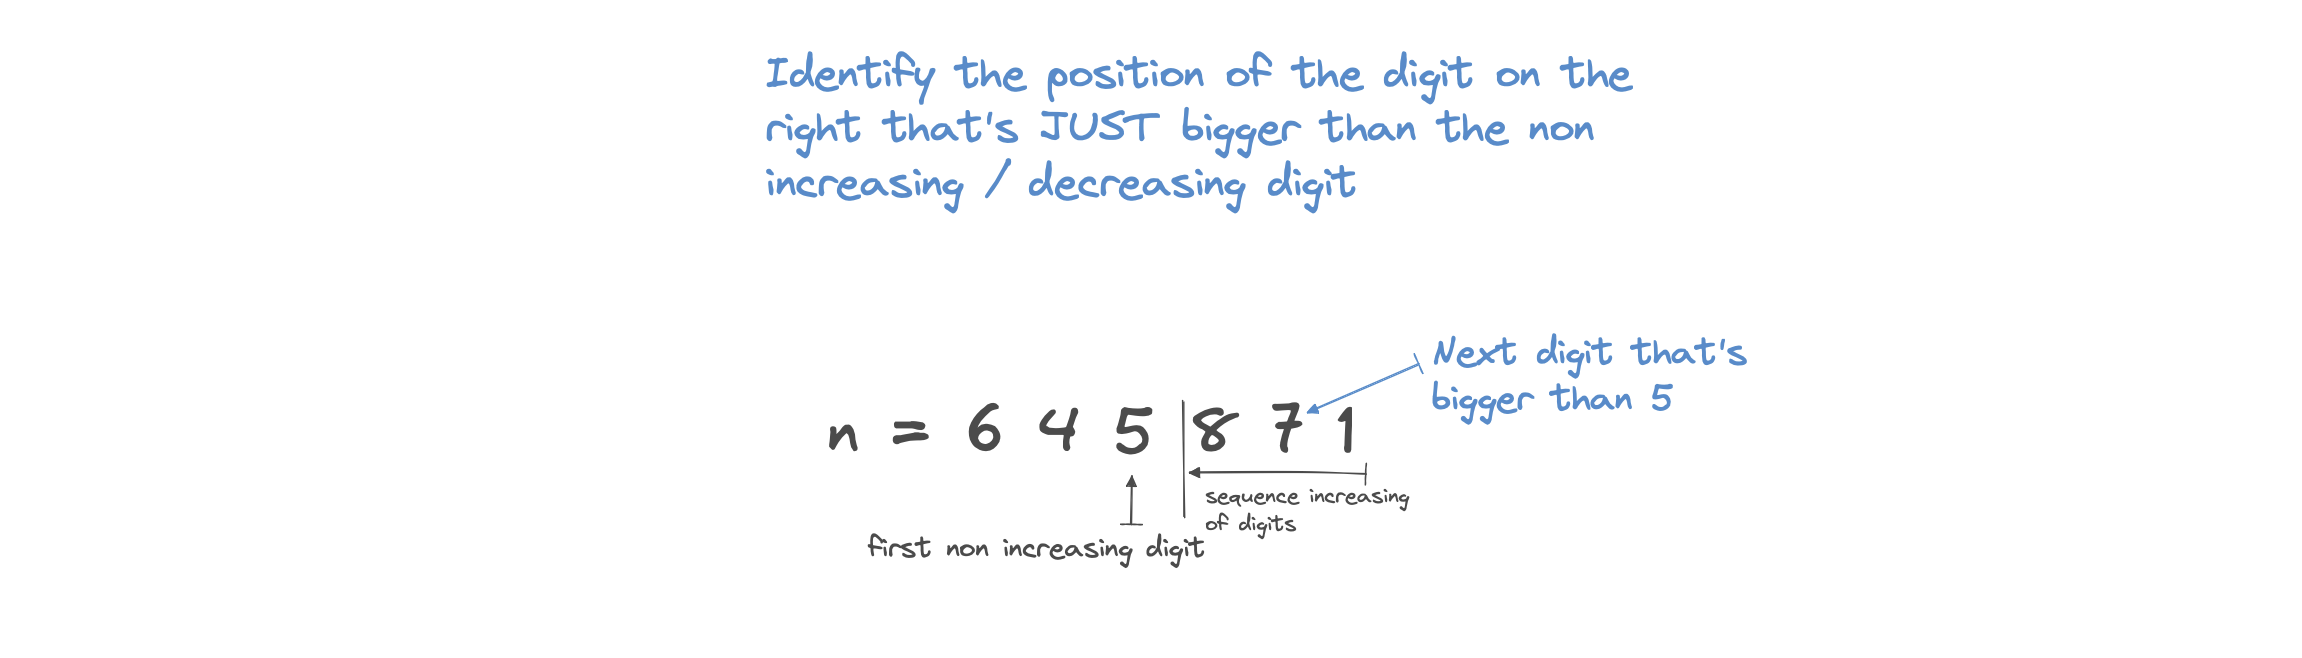

3. Thirdly we swap their positions (to form the **next largest permutation**) and then reverse the remaining digits on the right inorder to make them as small as possible.

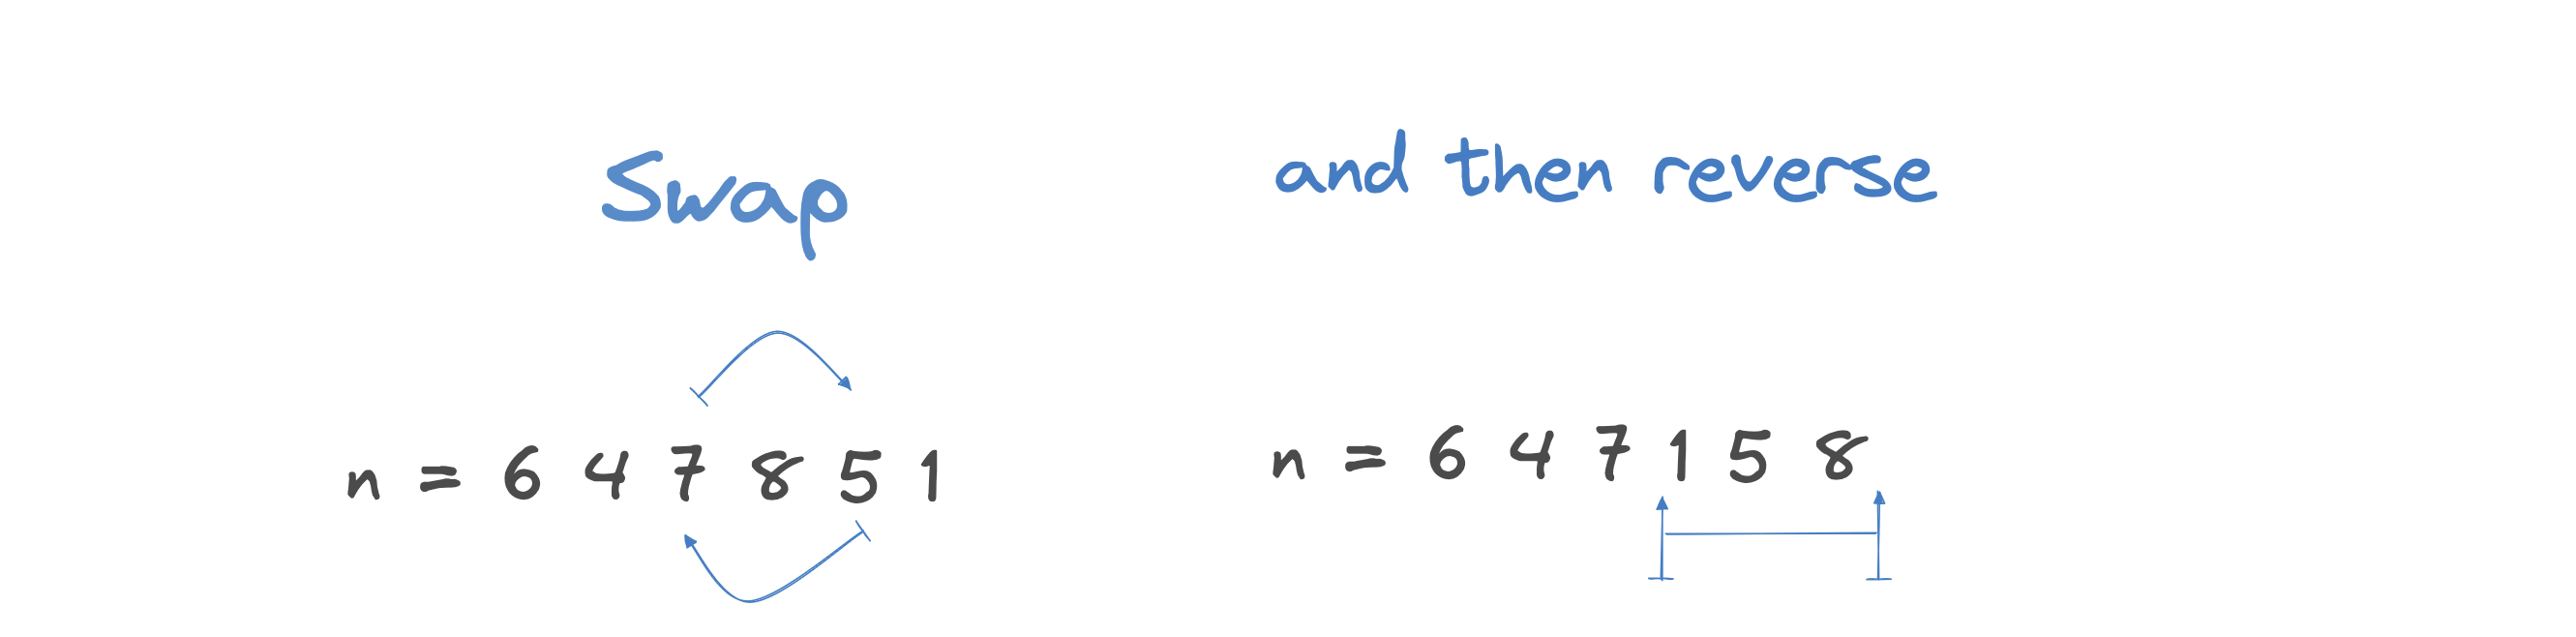

#### Visual summary of the next greater permutation solution:

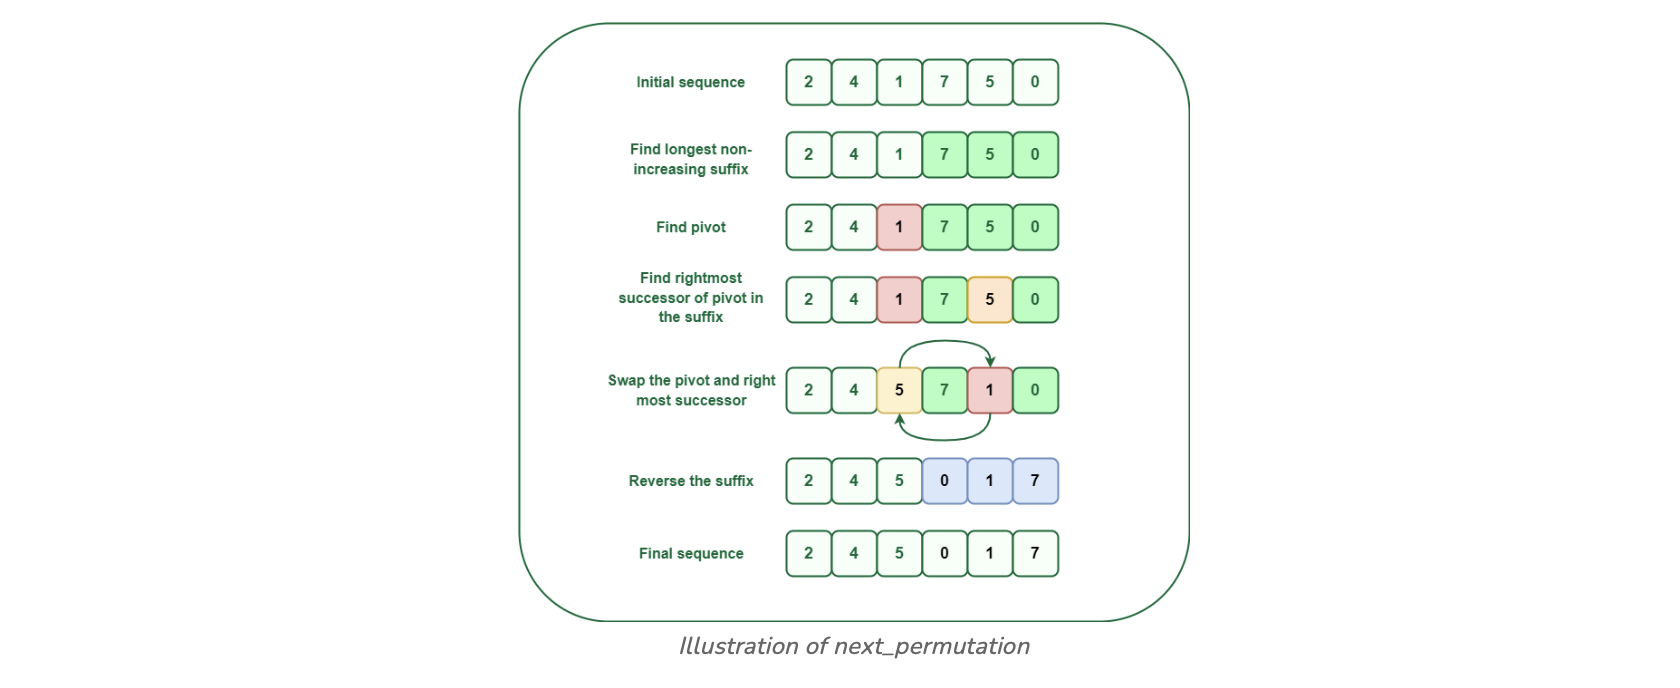

In [ ]:
class Solution:
    def reverse(self, arr, l, r):

        while l < r:
            arr[l],arr[r] = arr[r],arr[l]
            l += 1
            r -= 1

    def nextGreaterElement(self, n: int) -> int:

        n = list(str(n))

        right = len(n) - 1

        # scan through the digits of n (starting from the end) until we find the first non-increasing digit / i.e. the first decreasing digit

        # check if next rightmost digit in n doesn't exceed the bounds of n  
        # and if the next rightmost digit in n >= the current rightmost digit in n
        while right - 1 >= 0 and n[right - 1] >= n[right]:

            # decrement right (so we can look / go to the next available rightmost digit in n)
            right -= 1

        # check if right = 0 (i.e. if right pointer is at the begining digit in n)
        if right == 0:
            # if yes (this means all the digits in n are in descending order)
            # therefore it's not possible to permutate the digits of n to form a larger integer than n
            return -1

        # initialize indexToSwap to the position of the last / end digit in `n`
        indexToSwap = len(n) - 1

        # scan through the digits of n (starting from the end) to find a digit > the non-increasing digit
        while indexToSwap >= 0 and n[right - 1] >= n[indexToSwap]:
            indexToSwap -= 1

        # swap the bigger digit with the non-increasing digit
        n[indexToSwap], n[right - 1] = n[right - 1], n[indexToSwap]

        # reverse the segment of n that starts from position = 'indexToSwap + 1' to the last / end digit in n
        self.reverse(n, right, len(n) - 1)

        # check if the doesn't fit into 32-bit integer
        if int("".join(n)) > 2**31 - 1:
            # return -1
            return -1

        # return the smallest largest possible integer
        return int("".join(n))        